In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [41]:
df['Age']=2020-df['year']

In [42]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8


<AxesSubplot:xlabel='Age', ylabel='selling_price'>

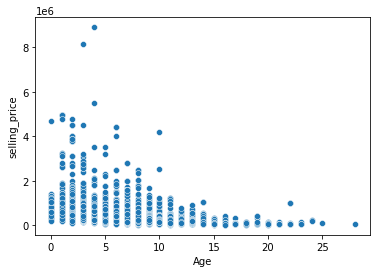

In [43]:
sns.scatterplot(x='Age',y='selling_price',data=df)

<AxesSubplot:>

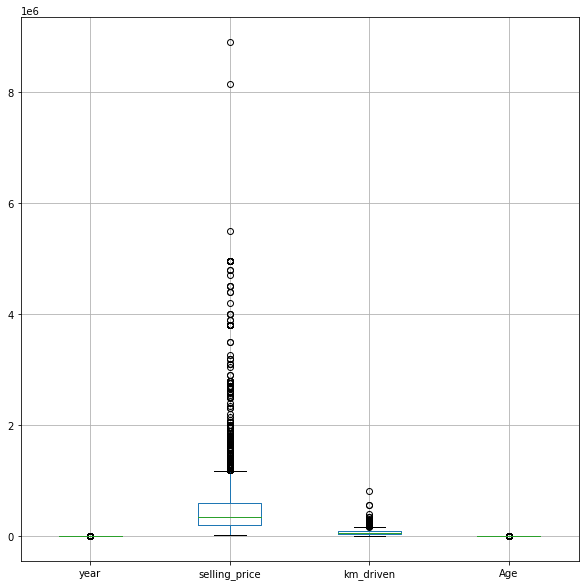

In [44]:
df.boxplot(figsize=(10,10))

<AxesSubplot:ylabel='km_driven'>

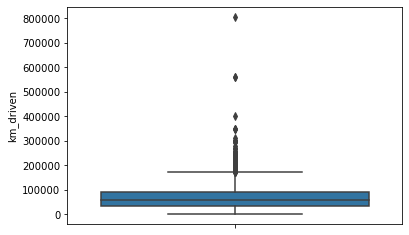

In [45]:
sns.boxplot(y='km_driven',data=df)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0
Age,4340.0,6.909217,4.215344,0.0,4.00,6.0,9.0,28.0


C:\Users\pnaik27\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

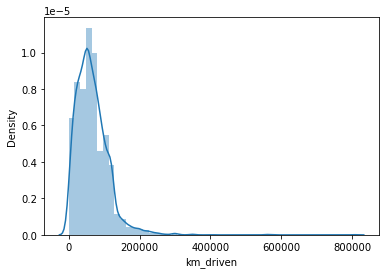

In [26]:
sns.distplot(df['km_driven'])

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

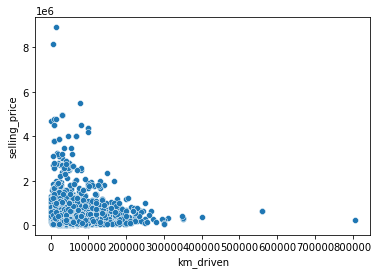

In [31]:
sns.scatterplot(x='km_driven',y='selling_price',data=df)

In [47]:
df['Log_km_driven']=np.log10(df['km_driven'])

<AxesSubplot:>

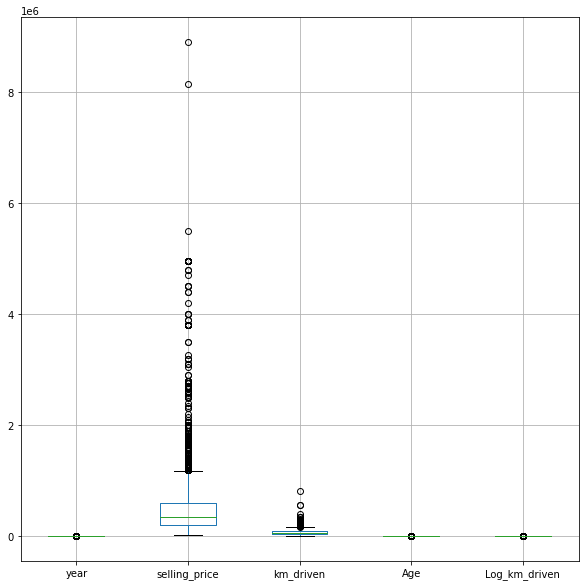

In [48]:
df.boxplot(figsize=(10,10))

In [30]:
df[df['km_driven']==806599.0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner,11


In [49]:
df.drop(columns=['name', 'year','km_driven'],inplace=True)

In [50]:
df.columns

Index(['selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'Age',
       'Log_km_driven'],
      dtype='object')

In [51]:
df=pd.get_dummies(df,columns=['fuel', 'seller_type','transmission', 'owner'],drop_first=True)

,selling_price,Age,Log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,13,4.845098,0,0,0,1,1,0,1,0,0,0,0
1,135000,13,4.698970,0,0,0,1,1,0,1,0,0,0,0
2,600000,8,5.000000,1,0,0,0,1,0,1,0,0,0,0
3,250000,3,4.662758,0,0,0,1,1,0,1,0,0,0,0
4,450000,6,5.149219,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,6,4.903090,1,0,0,0,1,0,1,0,1,0,0
4336,409999,6,4.903090,1,0,0,0,1,0,1,0,1,0,0
4337,110000,11,4.919078,0,0,0,1,1,0,1,0,1,0,0
4338,865000,4,4.954243,1,0,0,0,1,0,1,0,0,0,0


In [56]:
scaler=StandardScaler()
var=['Age', 'Log_km_driven']
df[var]=scaler.fit_transform(df[var])
df.head(3)

,selling_price,Age,Log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,1.445074,0.379270,0,0,0,1,1,0,1,0,0,0,0
1,135000,1.445074,0.005543,0,0,0,1,1,0,1,0,0,0,0
2,600000,0.258795,0.775436,1,0,0,0,1,0,1,0,0,0,0


In [58]:
y=df['selling_price']
x=df.drop(columns='selling_price')

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [64]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred=reg.predict(x_test)

In [65]:
reg.score(x_train,y_train)

0.46113664459025916

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.45957921611149843

In [76]:
import statsmodels.api as sm

In [77]:

model=sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              686.2
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                        13:57:26   Log-Likelihood:                         -62540.
No. Observations:                4340   AIC:                                  1.251e+05
Df Residuals:                    4327   BIC:                                  1.252e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Age                          -1.514e+05   8565.526    -17.670      0.000   -1.68e+05   -1.35e+05
Log_km_driven                -5.923e+04   8485.054     -6.981      0.000   -7.59e+04   -4.26e+04
fuel_Diesel                   1.372e+06   2.27e+04     60.418      0.000    1.33e+06    1.42e+06
fuel_Electric                     6e+05    4.4e+05      1.365      0.172   -2.62e+05    1.46e+06
fuel_LPG                      1.119e+06   9.46e+04     11.838      0.000    9.34e+05     1.3e+06
fuel_Petrol                   1.074e+06   2.36e+04     45.526      0.000    1.03e+06    1.12e+06
seller_type_Individual        -3.94e+04   1.69e+04     -2.334      0.020   -7.25e+04   -6303.679
seller_type_Trustmark Dealer  1.969e+05   4.58e+04      4.299      0.000    1.07e+05    2.87e+05
transmission_Manual          -7.653e+05   2.18e+04    -35.075      0.000   -8.08e+05   -7.23e+05
owner_Fourth & Above Owner    4.122e+04   5.13e+04      0.804      0.421   -5.93e+04    1.42e+05
owner_Second Owner           -2.086e+04   1.71e+04     -1.218      0.223   -5.44e+04    1.27e+04
owner_Test Drive Car          9152.5737   1.11e+05      0.082      0.934   -2.09e+05    2.27e+05
owner_Third Owner            -2.674e+04   2.85e+04     -0.937      0.349   -8.27e+04    2.92e+04
==============================================================================
Omnibus:                     4393.733   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451173.691
Skew:                           4.754   Prob(JB):                         0.00
Kurtosis:                      52.036   Cond. No.                         95.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
x.columns

Index(['Age', 'Log_km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [80]:
x.drop(columns=['owner_Fourth & Above Owner','owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],inplace=True)

In [87]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.33,random_state=52)

In [88]:
model_1=reg.fit(x1_train,y1_train)

In [89]:
y1_pred=model_1.predict(x1_test)

In [90]:
model_1.score(x1_train,y1_train)

0.4721161666173771

In [91]:
model=sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              991.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:06:46   Log-Likelihood:                         -62541.
No. Observations:                4340   AIC:                                  1.251e+05
Df Residuals:                    4331   BIC:                                  1.252e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Age                          -1.539e+05   7955.357    -19.343      0.000   -1.69e+05   -1.38e+05
Log_km_driven                -6.039e+04   8207.921     -7.357      0.000   -7.65e+04   -4.43e+04
fuel_Diesel                   1.368e+06   2.25e+04     60.872      0.000    1.32e+06    1.41e+06
fuel_Electric                 5.836e+05   4.39e+05      1.329      0.184   -2.78e+05    1.44e+06
fuel_LPG                      1.116e+06   9.45e+04     11.807      0.000     9.3e+05     1.3e+06
fuel_Petrol                    1.07e+06   2.34e+04     45.657      0.000    1.02e+06    1.12e+06
seller_type_Individual       -4.342e+04   1.64e+04     -2.644      0.008   -7.56e+04   -1.12e+04
seller_type_Trustmark Dealer  1.973e+05   4.57e+04      4.313      0.000    1.08e+05    2.87e+05
transmission_Manual          -7.648e+05   2.18e+04    -35.136      0.000   -8.08e+05   -7.22e+05
==============================================================================
Omnibus:                     4390.599   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449851.460
Skew:                           4.749   Prob(JB):                         0.00
Kurtosis:                      51.964   Cond. No.                         93.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y1_test,y1_pred)
(mean_squared_error(y1_test,y1_pred))**0.5

447762.55978908006

In [ ]:
https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82